In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#function to flatten a list of lists
def flatten(l):
    out = []
    for item in l:
        if isinstance(item, (list,tuple)):
            out.extend(flatten(item))
        else:
            out.append(item)
    return out

In [3]:
#Pull in dataset
clean_data_raw = "../data/clean_data.csv"

In [4]:
#Enter into dataframe
clean_data = pd.read_csv(clean_data_raw, header =0)

In [5]:
#select columns needed for analysis
actor_analysis = clean_data[["Actors", "Country", "Genre", "Language",\
                            "Year", "Title", "rating", "Awards"]]

In [6]:
#Show Data Frame
actor_analysis.head()

,Actors,Country,Genre,Language,Year,Title,rating,Awards
0,"Charlize Theron, Christina Ricci, Bruce Dern, ...","Germany, USA","Biography, Crime, Drama, Thriller",English,2003,Monster,3,Won 1 Oscar. Another 29 wins & 25 nominations.
1,"Devon Alan, Laura Harris, Zooey Deschanel, Mar...","Canada, USA",NaN,English,2003,It's Better to Be Wanted for Murder Than Not t...,1,1 nomination.
2,"Halle Berry, Robert Downey Jr., Charles S. Dut...","USA, France, Canada, Spain","Horror, Mystery, Thriller",English,2003,Gothika,3,3 wins & 7 nominations.
3,"Sean Connery, Naseeruddin Shah, Peta Wilson, T...","USA, Germany, Czech Republic, UK","Action, Adventure, Fantasy, Sci-Fi","English, German, Italian",2003,The League of Extraordinary Gentlemen,0,12 nominations.
4,"Pamela Anderson, Jenny McCarthy, Marny Eng, Ch...","USA, Canada",Comedy,English,2003,Scary Movie 3,3,2 wins & 4 nominations.


In [7]:
#Pull all values for passers of 3 for Bechdel Test
pass_3_df = actor_analysis.loc[actor_analysis["rating"] == 3, :]
data3 = pass_3_df.copy()

In [8]:
#Pull all values for passers of 2 for Bechdel Test
pass_2_df = actor_analysis.loc[actor_analysis["rating"] == 2, :]
data2 = pass_2_df.copy()

In [9]:
#Pull all values for passers of 1 for Bechdel Test
pass_1_df = actor_analysis.loc[actor_analysis["rating"] == 1, :]
data1 = pass_1_df.copy()

In [10]:
#Pull all values for passers of 0 for Bechdel Test
pass_0_df = actor_analysis.loc[actor_analysis["rating"] == 0, :]
data0 = pass_0_df.copy()

In [11]:
#Split the string values for actors into lists for processing
data3["Actors"]= data3["Actors"].str.split(", ", n = -1, expand = False)
data2["Actors"]= data2["Actors"].str.split(", ", n = -1, expand = False)
data1["Actors"]= data1["Actors"].str.split(", ", n = -1, expand = False)
data0["Actors"]= data0["Actors"].str.split(", ", n = -1, expand = False)

In [12]:
#Flatten the lists
#Variable for list of lists
b3 = data3["Actors"]
b2 = data2["Actors"]
b1 = data1["Actors"]
b0 = data0["Actors"]

#Flatten and count number of time a name appears
bechdel3 = pd.Series(flatten(b3)).value_counts()
bechdel2 = pd.Series(flatten(b2)).value_counts()
bechdel1 = pd.Series(flatten(b1)).value_counts()
bechdel0 = pd.Series(flatten(b0)).value_counts()

In [13]:
#Make DataFrames
bechdel_actors = pd.DataFrame(bechdel0, columns= ["Score of 0"])

#List to series to make compatible with data frame
series1 = pd.DataFrame(bechdel1, columns= ["Score of 1"])
series2 = pd.DataFrame(bechdel2, columns= ["Score of 2"])
series3 = pd.DataFrame(bechdel3, columns= ["Score of 3"])

#Merge the next three datasets and fill na values with zeroes
bechdel_actors = bechdel_actors.merge(series1, how="outer", left_index = True, \
                                      right_index = True).fillna(0)
bechdel_actors = bechdel_actors.merge(series2, how="outer", left_index = True, \
                                      right_index = True).fillna(0)
bechdel_actors = bechdel_actors.merge(series3, how="outer", left_index = True, \
                                      right_index = True).fillna(0)

In [14]:
#Add a column for the sum of the movies
bechdel_actors['Total Movies'] = bechdel_actors[list(bechdel_actors.columns)].sum(axis=1)

In [39]:
#Sort by top scoring performers
bechdel_actors3 = bechdel_actors.sort_values(["Score of 3"],  ascending = False)
bechdel_actors3.head()

,Score of 0,Score of 1,Score of 2,Score of 3,Total Movies
Meryl Streep,1.0,2.0,1.0,23.0,27.0
Julianne Moore,0.0,5.0,2.0,21.0,28.0
Nicole Kidman,2.0,1.0,3.0,20.0,26.0
Scarlett Johansson,1.0,2.0,2.0,19.0,24.0
Reese Witherspoon,0.0,2.0,2.0,19.0,23.0


In [16]:
#Number of actors
total_actors = len(bechdel_actors)
total_actors

16440

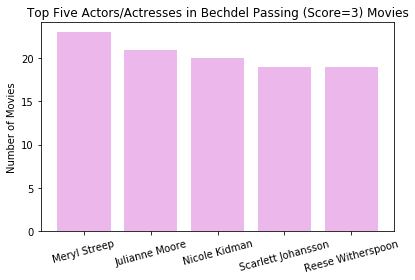

In [58]:
#Bar chart of top five Bechdel Passing performers
x_axis = np.arange(1, 6, 1)
y_axis = bechdel_actors3.iloc[0:5, 3]
tick_loc = ["Meryl Streep", "Julianne Moore", "Nicole Kidman", "Scarlett Johansson",\
           "Reese Witherspoon"]

plt.bar(tick_loc, y_axis, color="orchid", alpha=.5, align="center", orientation="vertical")
plt.xticks(rotation=15)

#Final labels
plt.title("Top Five Actors/Actresses in Bechdel Passing (Score=3) Movies")
plt.ylabel("Number of Movies")

#Save the figure
plt.tight_layout()
plt.savefig("../Images/Top_five.png")

In [49]:
#Top actors in passing scores of 1
#Sort by top scoring performers
bechdel_actors1 = bechdel_actors.sort_values(["Score of 1"],  ascending = False)
bechdel_actors1.head()

,Score of 0,Score of 1,Score of 2,Score of 3,Total Movies
Johnny Depp,1.0,17.0,2.0,15.0,35.0
Robert De Niro,3.0,17.0,7.0,12.0,39.0
Bruce Willis,1.0,15.0,2.0,11.0,29.0
Tom Hanks,2.0,14.0,8.0,10.0,34.0
Tom Cruise,4.0,13.0,4.0,7.0,28.0


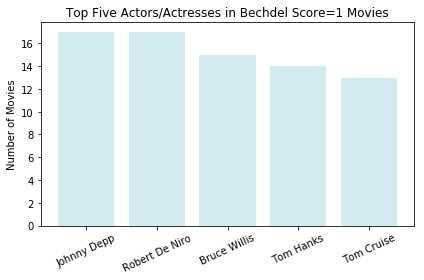

In [59]:
#Bar chart of top five Bechdel Passing performers
x_axis = np.arange(1, 6, 1)
y_axis = bechdel_actors1.iloc[0:5, 1]
tick_loc = ["Johnny Depp", "Robert De Niro", "Bruce Willis", "Tom Hanks",\
           "Tom Cruise"]

plt.bar(tick_loc, y_axis, color="lightblue", alpha=.5, align="center")
plt.xticks(rotation=25)

#Final labels
plt.title("Top Five Actors/Actresses in Bechdel Score=1 Movies")
plt.ylabel("Number of Movies")

#Save the figure
plt.tight_layout()
plt.savefig("../Images/top_five_score_1.png")

In [60]:
#Top actors in Bechdel Fails
#Sort by top scoring performers
bechdel_actors0 = bechdel_actors.sort_values(["Score of 0"],  ascending = False)
bechdel_actors0.head()

,Score of 0,Score of 1,Score of 2,Score of 3,Total Movies
Georges Méliès,26.0,0.0,0.0,0.0,26.0
Harold Lloyd,9.0,1.0,0.0,0.0,10.0
Buster Keaton,8.0,1.0,0.0,0.0,9.0
Sylvester Stallone,7.0,6.0,4.0,3.0,20.0
Jason Statham,7.0,6.0,1.0,7.0,21.0


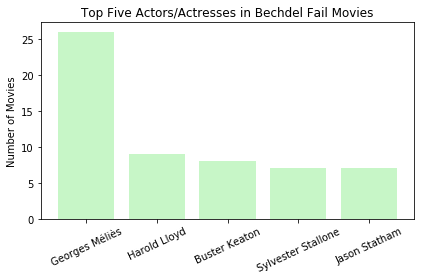

In [63]:
#Bar chart of top five Bechdel Passing performers
x_axis = np.arange(1, 6, 1)
y_axis = bechdel_actors0.iloc[0:5, 0]
tick_loc = ["Georges Méliès", "Harold Lloyd", "Buster Keaton", "Sylvester Stallone",\
           "Jason Statham"]

plt.bar(tick_loc, y_axis, color="lightgreen", alpha=.5, align="center")
plt.xticks(rotation=25)

#Final labels
plt.title("Top Five Actors/Actresses in Bechdel Fail Movies")
plt.ylabel("Number of Movies")

#Save the figure
plt.tight_layout()
plt.savefig("../Images/top_five_score_0.png")

In [76]:
#Pie charts for Tom Hanks, Johnny Depp, Meryl Streep, Sandra Bullock and Julianne Moore
#Make variables to store info for each actor
johnny_depp = bechdel_actors.loc["Johnny Depp"]
tom_hanks = bechdel_actors.loc["Tom Hanks"]
meryl_streep = bechdel_actors.loc["Meryl Streep"]
sandra_bullock = bechdel_actors.loc["Sandra Bullock"]
julianne_moore = bechdel_actors.loc["Julianne Moore"]


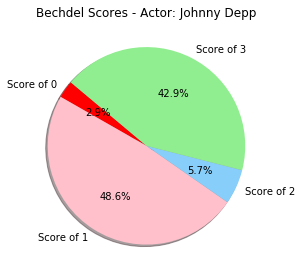

In [74]:
#Pie chart for Johnny Depp
labels = ["Score of 0", "Score of 1", "Score of 2", "Score of 3"]
num_movies = [1, 17, 2, 15]
colors=["red", "pink", "lightskyblue", "lightgreen"]

#Make pie chart
JD = plt.pie(num_movies, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Bechdel Scores - Actor: Johnny Depp")

#Save figure
plt.tight_layout()
plt.savefig("../Images/Johnny_Depp.png")

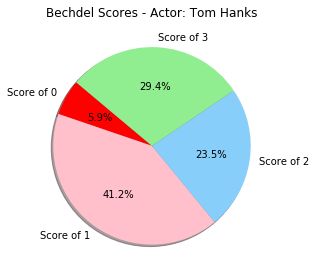

In [79]:
#Pie chart for Tom Hanks
labels = ["Score of 0", "Score of 1", "Score of 2", "Score of 3"]
num_movies = [2, 14, 8, 10]
colors=["red", "pink", "lightskyblue", "lightgreen"]

#Make pie chart
JD = plt.pie(num_movies, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Bechdel Scores - Actor: Tom Hanks")

#Save figure
plt.tight_layout()
plt.savefig("../Images/Tom_Hanks.png")

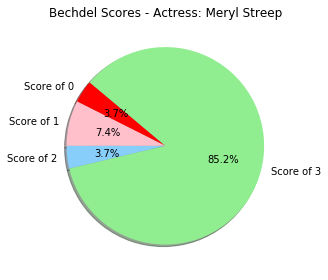

In [82]:
#Pie Chart for Meryl Streep
labels = ["Score of 0", "Score of 1", "Score of 2", "Score of 3"]
num_movies = [1, 2, 1, 23]
colors=["red", "pink", "lightskyblue", "lightgreen"]

#Make pie chart
JD = plt.pie(num_movies, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Bechdel Scores - Actress: Meryl Streep")

#Save figure
plt.tight_layout()
plt.savefig("../Images/Meryl_Streep.png")

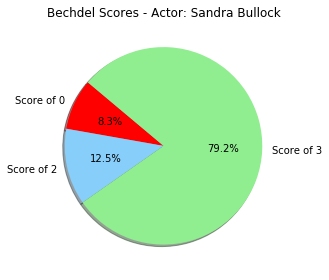

In [85]:
#Pie chart for Sandra Bullock
sandra_bullock
labels = ["Score of 0", "Score of 2", "Score of 3"]
num_movies = [2, 3, 19]
colors=["red", "lightskyblue", "lightgreen"]

#Make pie chart
JD = plt.pie(num_movies, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Bechdel Scores - Actor: Sandra Bullock")

#Save figure
plt.tight_layout()
plt.savefig("../Images/Sandra_Bullock.png")

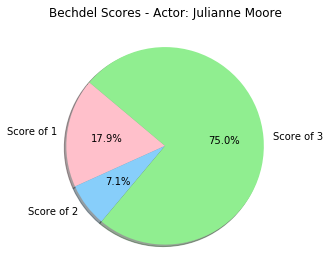

In [87]:
#Pie chart for Julianne Moore
julianne_moore
labels = ["Score of 1", "Score of 2", "Score of 3"]
num_movies = [5, 2, 21]
colors=["pink", "lightskyblue", "lightgreen"]

#Make pie chart
JD = plt.pie(num_movies, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Bechdel Scores - Actor: Julianne Moore")

#Save figure
plt.tight_layout()
plt.savefig("../Images/Julianne_Moore.png")